In [1]:
import json
import pandas as pd
import os

In [2]:
# Load the JSON dataset, using the restructured dataset.
root_path = "../data"
file_name = 'restructured_dataset.json'

file_path = os.path.join(root_path, file_name)
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

In [3]:
len(data)

6044

In [4]:
df = pd.DataFrame(data)

In [5]:
# 1. Dataset overview
overview = {
    "Total Commands": len(df),
    "Unique Intents": df['intent'].nunique(),
    "Intent Distribution": df['intent'].value_counts().to_dict(),
}

In [6]:
overview

{'Total Commands': 6044,
 'Unique Intents': 2,
 'Intent Distribution': {'single_room_control': 4851,
  'multi_room_control': 1193}}

In [19]:
#ensure all room-action pairs in multi_room_control are correctly expanded
explicit_records = []

for item in data:
    if item['intent'] == 'multi_room_control':
        # Iterate through actions to handle multiple room-action pairs
        for action in item.get('actions', []):
            explicit_records.append({
                'command': item['command'],
                'intent': item['intent'],
                'room': action.get('room', None),  # Specific room for this action
                'action': action.get('action', None),  # Corresponding action
                'color': action.get('color', None),
                'brightness': action.get('brightness', None)
            })
    else:  # Single room control and other intents
        for action in item.get('actions', []):
            explicit_records.append({
                'command': item['command'],
                'intent': item['intent'],
                'room': action.get('room', None),
                'action': action.get('action', None),
                'color': action.get('color', None),
                'brightness': action.get('brightness', None)
            })

In [20]:
# Convert the explicitly processed records into a DataFrame
explicit_df = pd.DataFrame(explicit_records)

In [40]:
len(explicit_df)

7304

In [22]:
# Verify explicit dataset stats and check a sample of multi_room_control rows
explicit_info = {
    "Total Records": len(explicit_df),
    "Unique Intents": explicit_df['intent'].nunique(),
    "Unique Rooms": explicit_df['room'].nunique(),
    "Unique Actions": explicit_df['action'].nunique(),
    "Null Values": explicit_df.isnull().sum().to_dict()
}

explicit_info

{'Total Records': 7304,
 'Unique Intents': 4,
 'Unique Rooms': 15,
 'Unique Actions': 4,
 'Null Values': {'command': 0,
  'intent': 0,
  'room': 0,
  'action': 0,
  'color': 5525,
  'brightness': 5356}}

In [24]:
explicit_df.head(20)

,command,intent,room,action,color,brightness
0,Kitchen ko lights off garidinus.,single_room_control,kitchen,turn_off,None,NaN
1,Please turn on the store room lights.,single_room_control,store room,turn_on,None,NaN
2,Baithak kotha and bhaancha ko lights full brig...,multi_room_control,living room,adjust_brightness,None,1.0
3,Baithak kotha and bhaancha ko lights full brig...,multi_room_control,kitchen,adjust_brightness,None,1.0
4,Turn off the balcony lights.,single_room_control,balcony,turn_off,None,NaN
5,Padhney kotha ko light blue color ma change ga...,change_color,study room,change_color,blue,NaN
6,Can you adjust the brightness to 0.5 in the be...,single_room_control,bedroom,adjust_brightness,None,0.5
7,Bhaanchaa kotha ko batti laal color ma change ...,change_color,kitchen,change_color,red,NaN
8,Please turn on the corridor lights and dim the...,multi_room_control,corridor,turn_on,None,NaN
9,Please turn on the corridor lights and dim the...,multi_room_control,terrace,adjust_brightness,None,0.2


In [25]:
import matplotlib.pyplot as plt

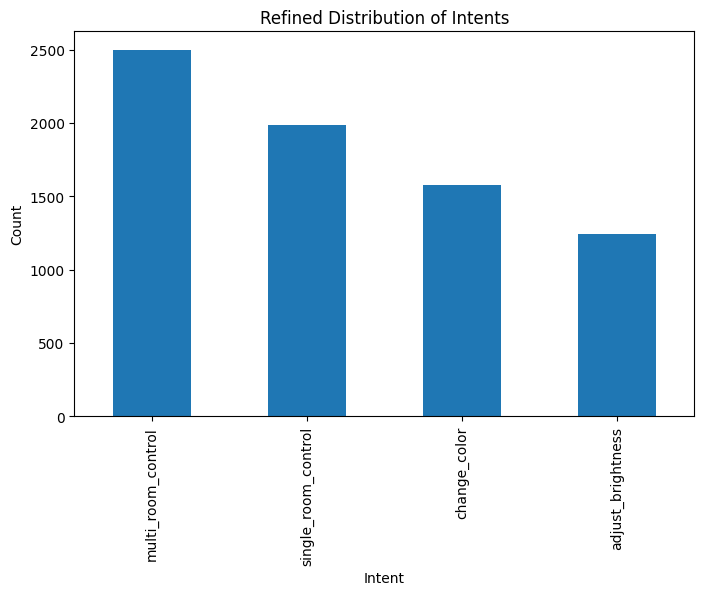

In [26]:
# Updated visualizations for the refined dataset

# Distribution of intents
refined_intent_counts = explicit_df['intent'].value_counts()
# Plot: Intent Distribution
plt.figure(figsize=(8, 5))
refined_intent_counts.plot(kind='bar', title='Refined Distribution of Intents')
plt.xlabel('Intent')
plt.ylabel('Count')
plt.show()

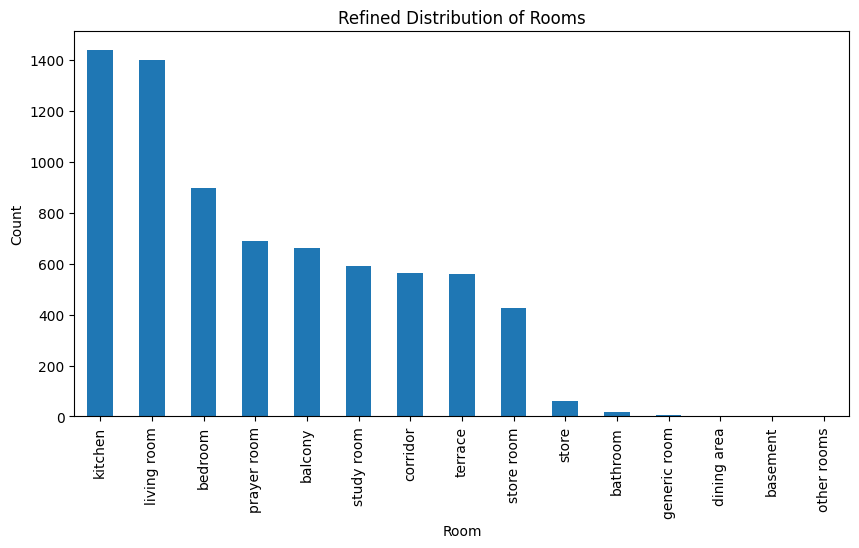

In [27]:
# Distribution of rooms
refined_room_counts = explicit_df['room'].value_counts()
# Plot: Room Distribution
plt.figure(figsize=(10, 5))
refined_room_counts.plot(kind='bar', title='Refined Distribution of Rooms')
plt.xlabel('Room')
plt.ylabel('Count')
plt.show()


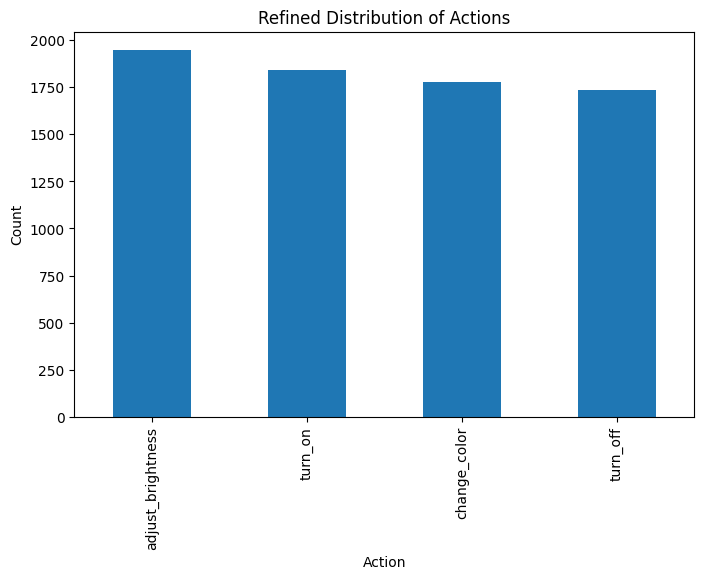

In [28]:
# Distribution of actions
refined_action_counts = explicit_df['action'].value_counts()
# Plot: Action Distribution
plt.figure(figsize=(8, 5))
refined_action_counts.plot(kind='bar', title='Refined Distribution of Actions')
plt.xlabel('Action')
plt.ylabel('Count')
plt.show()

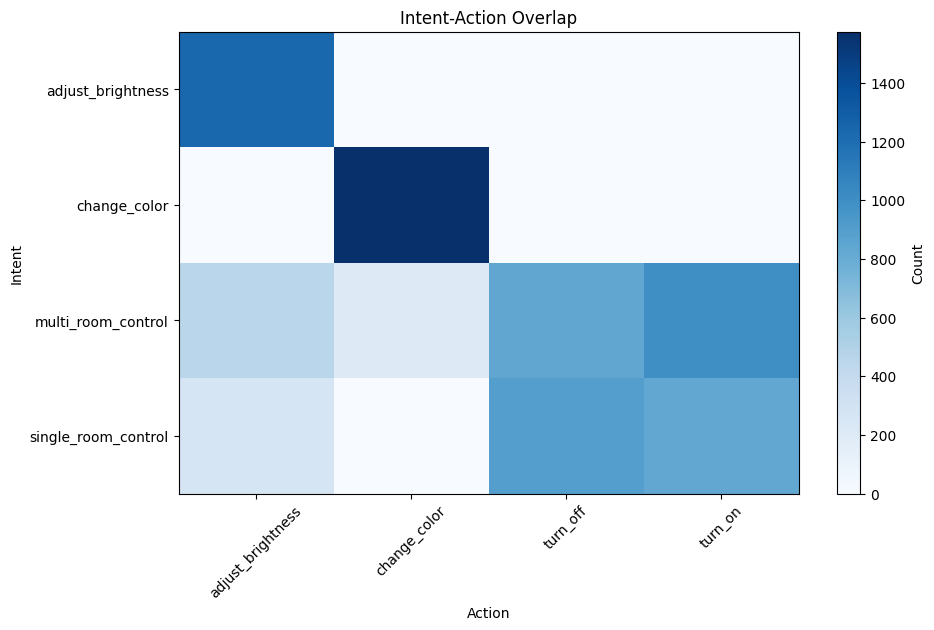

action,adjust_brightness,change_color,turn_off,turn_on
intent,,,,
adjust_brightness,1237,0,0,4
change_color,0,1575,0,0
multi_room_control,451,205,841,1002
single_room_control,260,0,893,836


In [29]:
# Create a crosstab to visualize the overlap between intents and actions
intent_action_crosstab = pd.crosstab(explicit_df['intent'], explicit_df['action'])

# Plot the crosstab as a heatmap for visualization
plt.figure(figsize=(10, 6))
plt.title('Intent-Action Overlap')
plt.imshow(intent_action_crosstab, cmap='Blues', aspect='auto')
plt.colorbar(label='Count')
plt.xticks(range(len(intent_action_crosstab.columns)), intent_action_crosstab.columns, rotation=45)
plt.yticks(range(len(intent_action_crosstab.index)), intent_action_crosstab.index)
plt.xlabel('Action')
plt.ylabel('Intent')
plt.show()

# Display the crosstab for detailed reference
intent_action_crosstab

## Observations:
### Adjust Brightness:
- As an intent: Appears 1,237 times, focused solely on brightness control.
- As an action in multi-room control: Appears 451 times, applied to specific rooms.

### Change Color:
- As an intent: 1,575 occurrences, dedicated to color changes.
- As an action in multi-room control: 205 occurrences.

### Turn On/Off:
- Primarily actions in both multi_room_control and single_room_control.


In [41]:
explicit_df

,command,intent,room,action,color,brightness,stratify_col
0,Kitchen ko lights off garidinus.,single_room_control,kitchen,turn_off,None,NaN,single_room_control_turn_off
1,Please turn on the store room lights.,single_room_control,store room,turn_on,None,NaN,single_room_control_turn_on
2,Baithak kotha and bhaancha ko lights full brig...,multi_room_control,living room,adjust_brightness,None,1.0,multi_room_control_adjust_brightness
3,Baithak kotha and bhaancha ko lights full brig...,multi_room_control,kitchen,adjust_brightness,None,1.0,multi_room_control_adjust_brightness
4,Turn off the balcony lights.,single_room_control,balcony,turn_off,None,NaN,single_room_control_turn_off
...,...,...,...,...,...,...,...
7299,Could you please turn off the lights in the co...,single_room_control,corridor,turn_off,None,NaN,single_room_control_turn_off
7300,Switch on the balcony lights and turn off the ...,multi_room_control,balcony,turn_on,None,NaN,multi_room_control_turn_on
7301,Switch on the balcony lights and turn off the ...,multi_room_control,store room,turn_off,None,NaN,multi_room_control_turn_off
7302,Padhney kotha ko batti ko color yellow garne s...,change_color,study room,change_color,yellow,NaN,change_color_change_color


In [79]:
len(explicit_df)

7304

In [90]:
#creating a dummy df for 
ddf = explicit_df.copy()
ddf = ddf[0:0]

In [92]:
ddf

,command,intent,room,action,color,brightness,stratify_col


In [107]:
for i in range(0, len(explicit_df)):
    if i+1 == len(explicit_df):
        ddf.loc[i, :] = explicit_df.loc[i, :]
        break
    if (explicit_df['command'][i] == explicit_df['command'][i+1]):
        pass
    else:
        ddf.loc[i, :] = explicit_df.loc[i, :]

In [108]:
len(ddf)

6044

In [111]:
ddf.iloc[-1]

command         Can you change the store room light to blue?
intent                                          change_color
room                                              store room
action                                          change_color
color                                                   blue
brightness                                               NaN
stratify_col                       change_color_change_color
Name: 7303, dtype: object